## Week 3 : SVM Classifier Solutions for the tasks

In this tutorial, we will use a smaller version of the MNIST Digit dataset and perform classification of the digits using SVM Classifier

#### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#### Load data

In [2]:
data = pd.read_csv('mnist_digits.csv')
print("Dimensions:", data.shape)
data.head()

Dimensions: (1800, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
target = data.pop('label')
target.head(10)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: label, dtype: int64

#### Understanding the data

In [4]:
# Each observation contains values of the pixels arranged as 28*28, print the first observation gives the following result: 

# Reshape the observation into matrix first and then print
for row in data.loc[0].values.reshape(28,28):
    print(' '.join('{:3}'.format(value) for value in row))

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  52 235 241 241 135 108 108  40   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   5  94 241 253 253 253 253 253 253 237 145   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0  13  95 216 253 254 253 223 173 173 190 253 253 240   0   0 

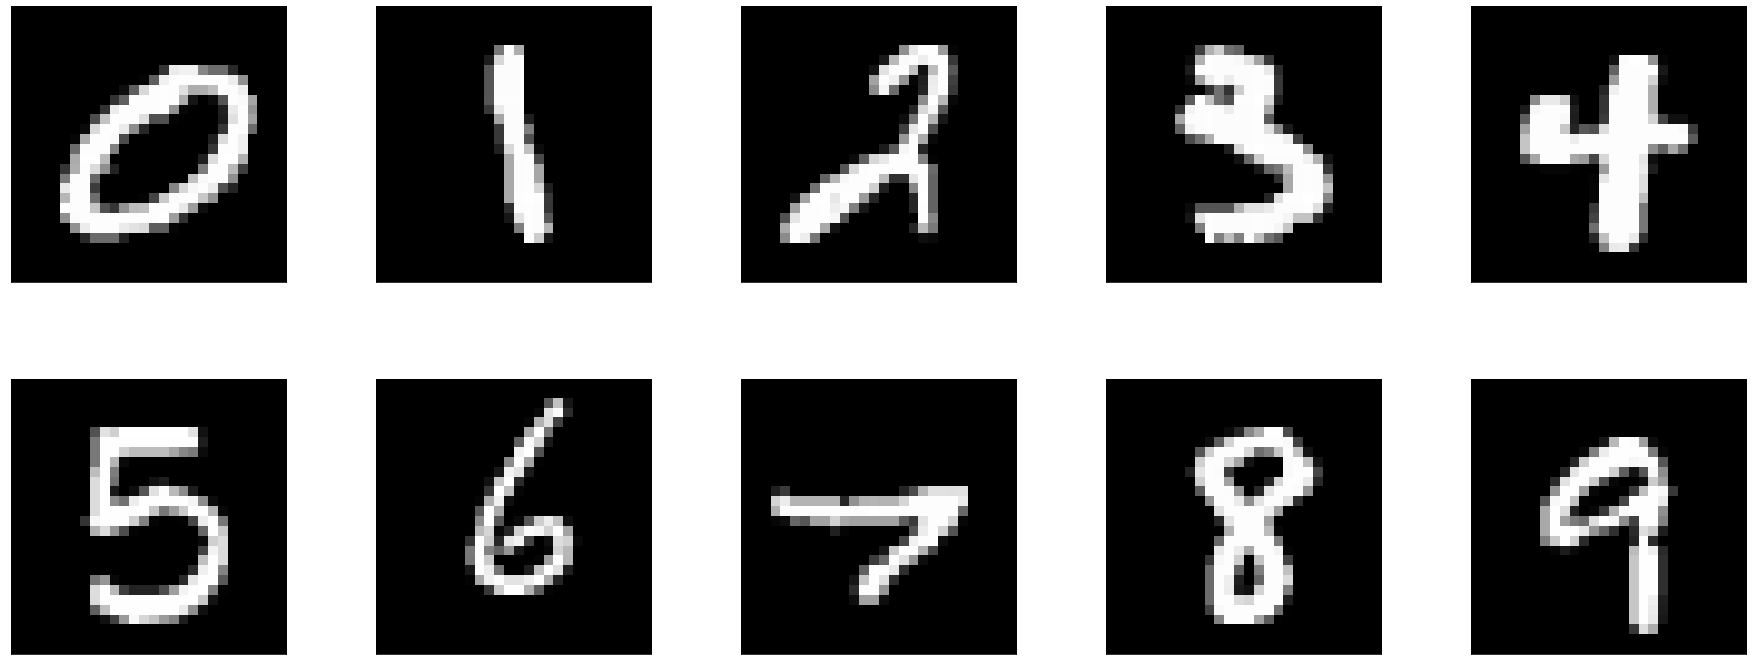

In [5]:
def plot_gallery(images, h, w, n_row=2, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(5 * n_col, 5 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
        
# Reshaping the pixel value to images 
# plotting the first 10 observations - 
plot_gallery(data.loc[range(10)].values.reshape(10, 28,28), 28, 28)

#### Basic checks before we move onto modelling :- 

In [6]:
data.isnull().sum().sum()

0

There are no missing values in this dataset.

In [7]:
data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,...,1800.000000,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.057778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.034990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


You can see that the max value of the max value of pixel774 is 84, whereas most features lie in much lower ranges (look at description of pixel 0, pixel 1 etc. above).

Thus, it seems like a good idea to rescale the features.

<AxesSubplot:>

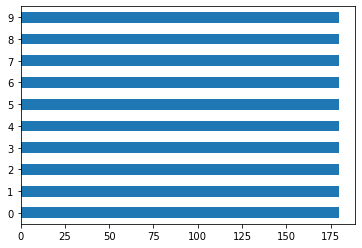

In [8]:
target.value_counts().plot(kind='barh')

The dataset contains equal observations for all the classes of digits.

#### Split into a training and testing set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

In [10]:
# Standardizing the training and testing data  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### SVM Classifier

Support vector machines are known to solve linear and non-linear problems. The idea of SVM is to create a hyperplane that divides the data into different classes. Read the <a href=https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC>documentation</a> for more information. Details of the scikit learn SVM Classifier can be found <a href=https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC>here</a>

#### Task 1:
Fit SVC with a **linear kernel** on the traning data and check the accuracy on the testing data

In [11]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
print("Training set accuracy score: ", round(accuracy_score(y_train, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test , svc.predict(X_test)), 4))

Training set accuracy score:  1.0
Testing set accuracy score:  0.9044


#### Task 2:

Fit SVC with a **radial basis function kernel** on the traning data and check the accuracy on the testing data

In [12]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
print("Training set accuracy score: ", round(accuracy_score(y_train, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test , svc.predict(X_test)), 4))

Training set accuracy score:  0.9874
Testing set accuracy score:  0.9378


#### Task 3:

Fit SVC with a **polynomial kernel** on the traning data and check the accuracy on the testing data. Also check if degree of the polynomial improves/aggravates the predictions

In [13]:
svc = SVC(kernel='poly', degree = 2) 
svc.fit(X_train, y_train)
print("Training set accuracy score: ", round(accuracy_score(y_train, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test , svc.predict(X_test)), 4))

Training set accuracy score:  0.9822
Testing set accuracy score:  0.9244


In [14]:
svc = SVC(kernel='poly', degree = 3) # default value of parameter degree = 3
svc.fit(X_train, y_train)
print("Training set accuracy score: ", round(accuracy_score(y_train, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test , svc.predict(X_test)), 4))

Training set accuracy score:  0.9763
Testing set accuracy score:  0.8844


In [15]:
svc = SVC(kernel='poly', degree = 4)
svc.fit(X_train, y_train)
print("Training set accuracy score: ", round(accuracy_score(y_train, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test , svc.predict(X_test)), 4))

Training set accuracy score:  0.9459
Testing set accuracy score:  0.8489


In [16]:
svc = SVC(kernel='poly', degree = 5)
svc.fit(X_train, y_train)
print("Training set accuracy score: ", round(accuracy_score(y_train, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test , svc.predict(X_test)), 4))

Training set accuracy score:  0.9067
Testing set accuracy score:  0.7756


In [17]:
svc = SVC(kernel='poly', degree = 6)
svc.fit(X_train, y_train)
print("Training set accuracy score: ", round(accuracy_score(y_train, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test , svc.predict(X_test)), 4))

Training set accuracy score:  0.8622
Testing set accuracy score:  0.6889


The difference in the accuracy scores of training and testing dataset is the least for SVM classifier polynomial kernel with a degree of 2.

#### Task 4: 

Fit SVC with a **sigmoid kernel** on the traning data and check the accuracy on the testing data

In [18]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
print("Training set accuracy score: ", round(accuracy_score(y_train, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test , svc.predict(X_test)), 4))

Training set accuracy score:  0.8726
Testing set accuracy score:  0.8644


#### Task 5:

Compare the performance of the classifiers developed above with different kernels and state which kernel performs better? Why?

SVM with the radial kernel seems to be the best classifier as the accuracy score is highest for the testing dataset and the difference in accuracy scores between the training and testing dataset is less. 
Interestingly, we observe that the generalisation accuracy (accuracy on test data) goes down as we increase the degree of the polynomial in the SVM kernel. This is because of overfitting. The dataset is too limited to learn a highly complex model.